In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [66]:
#I downloaded the data set from https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

df = pd.read_csv('amazon_reviews/Reviews.csv')

# for testing
#df = df.head(500)

In [80]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Some Data Analysis

Text(0, 0.5, 'Count')

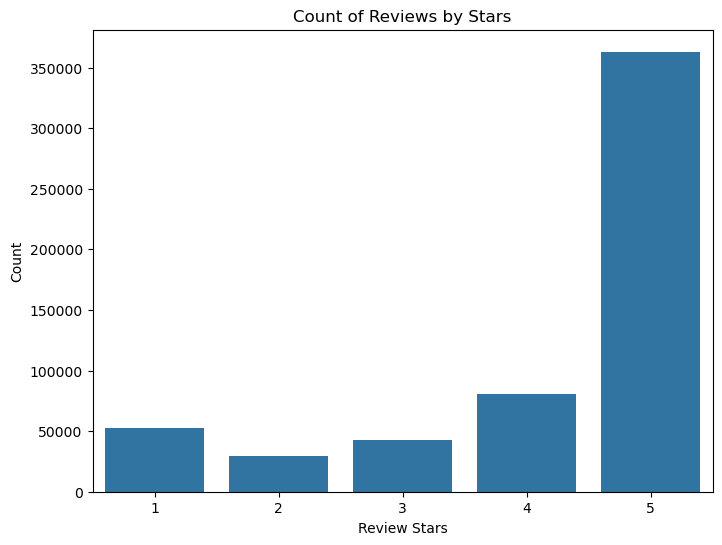

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(df.Score.value_counts().sort_index())
plt.title("Count of Reviews by Stars")
plt.xlabel("Review Stars")
plt.ylabel("Count")

## Using VADER sentiment scoring

In [69]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ankit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
sia = SentimentIntensityAnalyzer()

In [71]:
# Running polarity score on the dataset

polarity_score = {}

for i, data in tqdm(df.iterrows(), total=len(df)):
    review_text = data['Text']
    review_id = data['Id']
    polarity_score[review_id] = sia.polarity_scores(review_text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [83]:
vaders_df = pd.DataFrame(polarity_score).T
vaders_df = vaders_df.reset_index().rename(columns={'index': 'Id'})

In [85]:
vaders_df = vaders_df.merge(df, on='Id')

<Axes: xlabel='Score', ylabel='compound'>

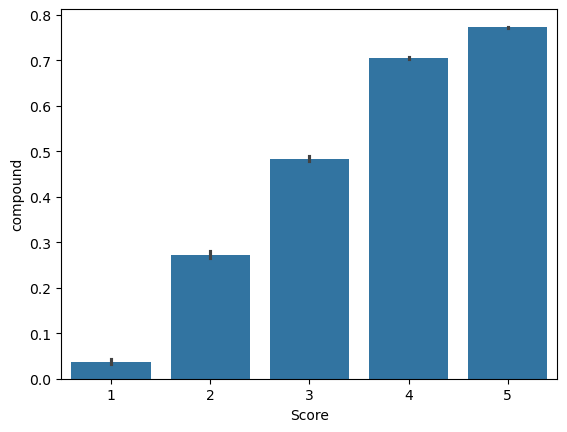

In [86]:
sns.barplot(vaders_df, x='Score', y='compound')

In [87]:
vaders_df.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

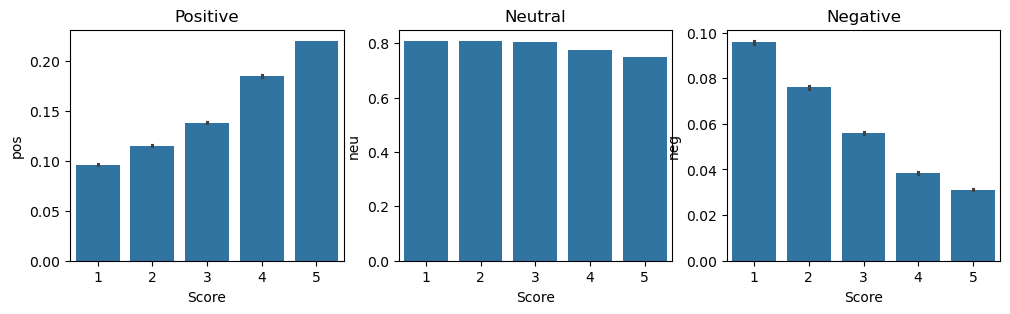

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vaders_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout